In [1]:
# Exploratory Data Analysis
# Only run once
import sys
import os

project_root = os.path.abspath('../')
os.chdir(project_root)

src_path = os.path.abspath(os.path.join(os.getcwd(), 'src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Setup

In [2]:
from load_data import DataLoader
from preprocess import Preprocessor, FeatureEngineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

dl = DataLoader()
pre = Preprocessor()
fe = FeatureEngineering()

In [3]:
train = dl.load_data('train.csv', 'data/raw')
test = dl.load_data('test.csv', 'data/raw')

# train_clean = dl.load_data('train_clean.csv', 'data/processed')
# test_clean = dl.load_data('test_clean.csv', 'data/processed')

train_df = train.copy()
test_df = test.copy()

# train_df = train_clean.copy()
# test_df = test_clean.copy()

# EDA

## Info

In [4]:
dl.data_info(train)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB

Describe:


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [5]:
dl.preview_data(train)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [6]:
dl.data_info(test)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254569 entries, 0 to 254568
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    254569 non-null  int64  
 1   annual_income         254569 non-null  float64
 2   debt_to_income_ratio  254569 non-null  float64
 3   credit_score          254569 non-null  int64  
 4   loan_amount           254569 non-null  float64
 5   interest_rate         254569 non-null  float64
 6   gender                254569 non-null  object 
 7   marital_status        254569 non-null  object 
 8   education_level       254569 non-null  object 
 9   employment_status     254569 non-null  object 
 10  loan_purpose          254569 non-null  object 
 11  grade_subgrade        254569 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 23.3+ MB

Describe:


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate
count,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000
mean,721278.000000,48233.080193,0.120583,681.037691,15016.753484,12.352323
std,73487.884676,26719.658580,0.068582,55.624118,6922.165182,2.017602
min,593994.000000,6011.770000,0.011000,395.000000,500.050000,3.200000
25%,657636.000000,27950.300000,0.072000,646.000000,10248.580000,10.980000
50%,721278.000000,46528.980000,0.096000,683.000000,15000.220000,12.370000
75%,784920.000000,61149.440000,0.156000,719.000000,18831.460000,13.690000
max,848562.000000,380653.940000,0.627000,849.000000,48959.260000,21.290000


In [7]:
dl.preview_data(test)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


## Cleaning and validate

In [31]:
def validate_and_clean_data(df, name="data", is_test=False):
    print(f"=== Data Validation and Cleaning for {name} ===")
    df_clean = df.copy()
    
    skip_cols = ['id']
    if not is_test:
        skip_cols.append('loan_paid_back')
    
    print("\n1. Checking numeric columns for non-numeric values:")
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        if col in skip_cols:
            continue

        str_values = df_clean[col].astype(str)
        non_numeric_mask = ~str_values.str.match(r'^-?\d*\.?\d*$')
        non_numeric_count = non_numeric_mask.sum()

        if non_numeric_count > 0:
            print(f"  - {col}: Found {non_numeric_count} non-numeric values")
            print(f"    Sample values: {df_clean[col][non_numeric_mask].unique()[:5]}")

            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    print("\n2. Checking categorical columns for data type issues:")
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        unique_vals = df_clean[col].unique()
        print(f"  - {col}: {len(unique_vals)} unique values")
        print(f"    Sample values: {unique_vals[:5]}")
        
        if len(unique_vals) > 50:
            try:
                numeric_test = pd.to_numeric(df_clean[col], errors='coerce')
                if numeric_test.notna().sum() / len(df_clean) > 0.8:
                    print(f"    WARNING: {col} might be numeric but stored as object")
                    print(f"    Consider converting to numeric type")
            except:
                pass
    
    print("\n3. Checking for constant columns:")
    constant_cols = [col for col in df_clean.columns if df_clean[col].nunique() <= 1]
    if constant_cols:
        print(f"  Found {len(constant_cols)} constant columns:")
        for col in constant_cols:
            print(f"    - {col}: {df_clean[col].iloc[0] if len(df_clean) > 0 else 'Empty'}")
    else:
        print("  No constant columns found")
    
    print("\n4. Checking for duplicate columns:")
    duplicate_cols = []
    for i, col1 in enumerate(df_clean.columns):
        for col2 in df_clean.columns[i+1:]:
            if df_clean[col1].equals(df_clean[col2]):
                duplicate_cols.append((col1, col2))
    
    if duplicate_cols:
        print(f"  Found {len(duplicate_cols)} duplicate column pairs:")
        for col1, col2 in duplicate_cols:
            print(f"    - {col1} == {col2}")
    else:
        print("  No duplicate columns found")
    
    print(f"\n5. Data types summary after cleaning:")
    print(f"  - Numeric columns: {len(df_clean.select_dtypes(include=['int64', 'float64']).columns)}")
    print(f"  - Categorical columns: {len(df_clean.select_dtypes(include=['object', 'category']).columns)}")
    print(f"  - Other types: {len(df_clean.select_dtypes(exclude=['int64', 'float64', 'object', 'category']).columns)}")
    
    return df_clean

train_clean = validate_and_clean_data(train_df, "train")
test_clean = validate_and_clean_data(test_df, "test", is_test=True)

=== Data Validation and Cleaning for train ===

1. Checking numeric columns for non-numeric values:

2. Checking categorical columns for data type issues:
  - gender: 3 unique values
    Sample values: ['Female' 'Male' 'Other']
  - marital_status: 4 unique values
    Sample values: ['Single' 'Married' 'Divorced' 'Widowed']
  - education_level: 5 unique values
    Sample values: ['High School' "Master's" "Bachelor's" 'PhD' 'Other']
  - employment_status: 5 unique values
    Sample values: ['Self-employed' 'Employed' 'Unemployed' 'Retired' 'Student']
  - loan_purpose: 8 unique values
    Sample values: ['Other' 'Debt consolidation' 'Home' 'Education' 'Vacation']
  - grade_subgrade: 30 unique values
    Sample values: ['C3' 'D3' 'C5' 'F1' 'D1']

3. Checking for constant columns:
  No constant columns found

4. Checking for duplicate columns:
  No duplicate columns found

5. Data types summary after cleaning:
  - Numeric columns: 7
  - Categorical columns: 6
  - Other types: 0
=== Data Val

In [32]:
def update_column_definitions(df, is_test=False):
    cols_to_drop = ['id']
    if not is_test:
        cols_to_drop.append('loan_paid_back')
    
    available_cols = [col for col in cols_to_drop if col in df.columns]
    df_features = df.drop(columns=available_cols)
    
    num_cols_updated = df_features.select_dtypes(include=['float64', 'int64']).columns
    cat_cols_updated = df_features.select_dtypes(include=['object', 'category']).columns
    
    print("Updated column definitions:")
    print(f"Numerical columns ({len(num_cols_updated)}): {list(num_cols_updated)}")
    print(f"Categorical columns ({len(cat_cols_updated)}): {list(cat_cols_updated)}")
    
    return num_cols_updated, cat_cols_updated

num_cols_clean, cat_cols_clean = update_column_definitions(train_clean, is_test=False)
num_cols_test, cat_cols_test = update_column_definitions(test_clean, is_test=True)

Updated column definitions:
Numerical columns (5): ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
Categorical columns (6): ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']
Updated column definitions:
Numerical columns (5): ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
Categorical columns (6): ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']


In [33]:
def fix_data_types(df):
    df_fixed = df.copy()
    
    for col in df_fixed.select_dtypes(include=['int64', 'float64']).columns:
        if col in ['id', 'loan_paid_back']:
            continue
        
        df_fixed[col] = pd.to_numeric(df_fixed[col], errors='coerce')
        
        if df_fixed[col].isna().sum() > df[col].isna().sum():
            print(f"Fixed non-numeric values in column '{col}'")
    
    return df_fixed

print("Checking and fixing data type issues...")
train_df = fix_data_types(train_df)
test_df = fix_data_types(test_df)

Checking and fixing data type issues...


In [34]:
train_clean.to_csv('data/processed/train_clean.csv', index=False)
test_clean.to_csv('data/processed/test_clean.csv', index=False)

In [11]:
num_cols = train_df.drop(columns=['id', 'loan_paid_back']).select_dtypes(include=['float64', 'int64']).columns
cat_cols = train_df.drop(columns=['id', 'loan_paid_back']).select_dtypes(include=['object', 'category', 'bool']).columns
num_cols_test = test_df.drop(columns=['id']).select_dtypes(include=['float64', 'int64']).columns
cat_cols_test = test_df.drop(columns=['id']).select_dtypes(include=['object', 'category', 'bool']).columns

## Missing value

In [12]:
def show_missing(df, name="data"):
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    if not missing.empty:
        print(f"Missing values in {name}:")
        display(missing)
        missing.plot(kind='bar', title=f'Missing Values in {name}')
        plt.show()
    else:
        print(f"No missing values found in {name}.")

In [13]:
show_missing(train_df, "train")

No missing values found in train.


## Data distribution

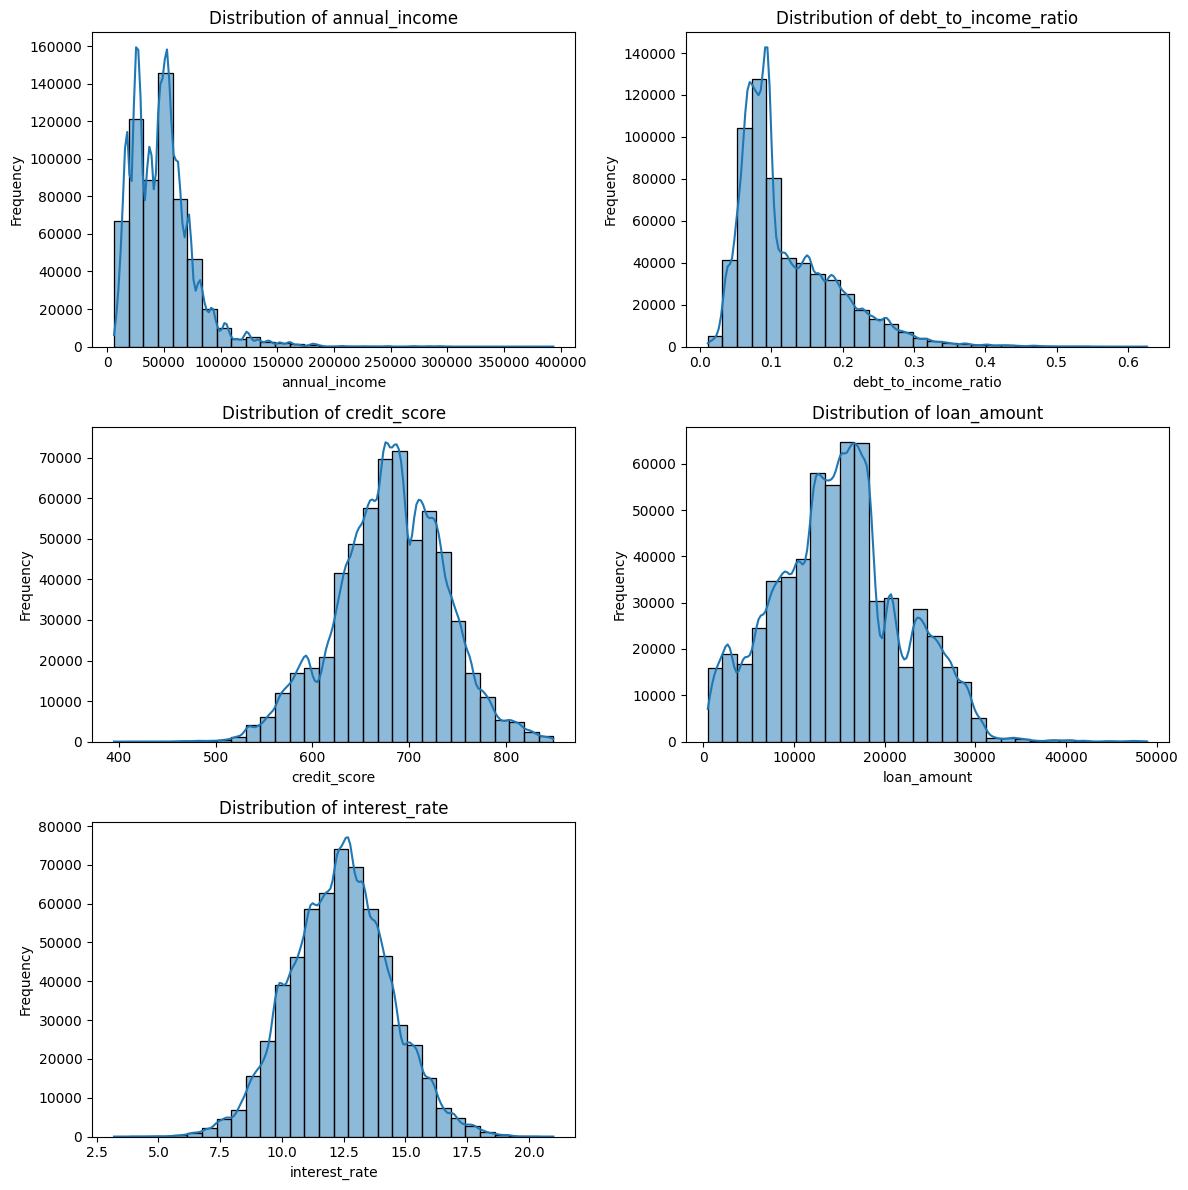

In [14]:
if len(num_cols) > 0:
    n_cols = 2
    n_rows = -(-len(num_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    if n_rows == 1 and len(num_cols) == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.histplot(train_df, x=col, kde=True, bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    for i in range(len(num_cols), len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found in the dataset.")

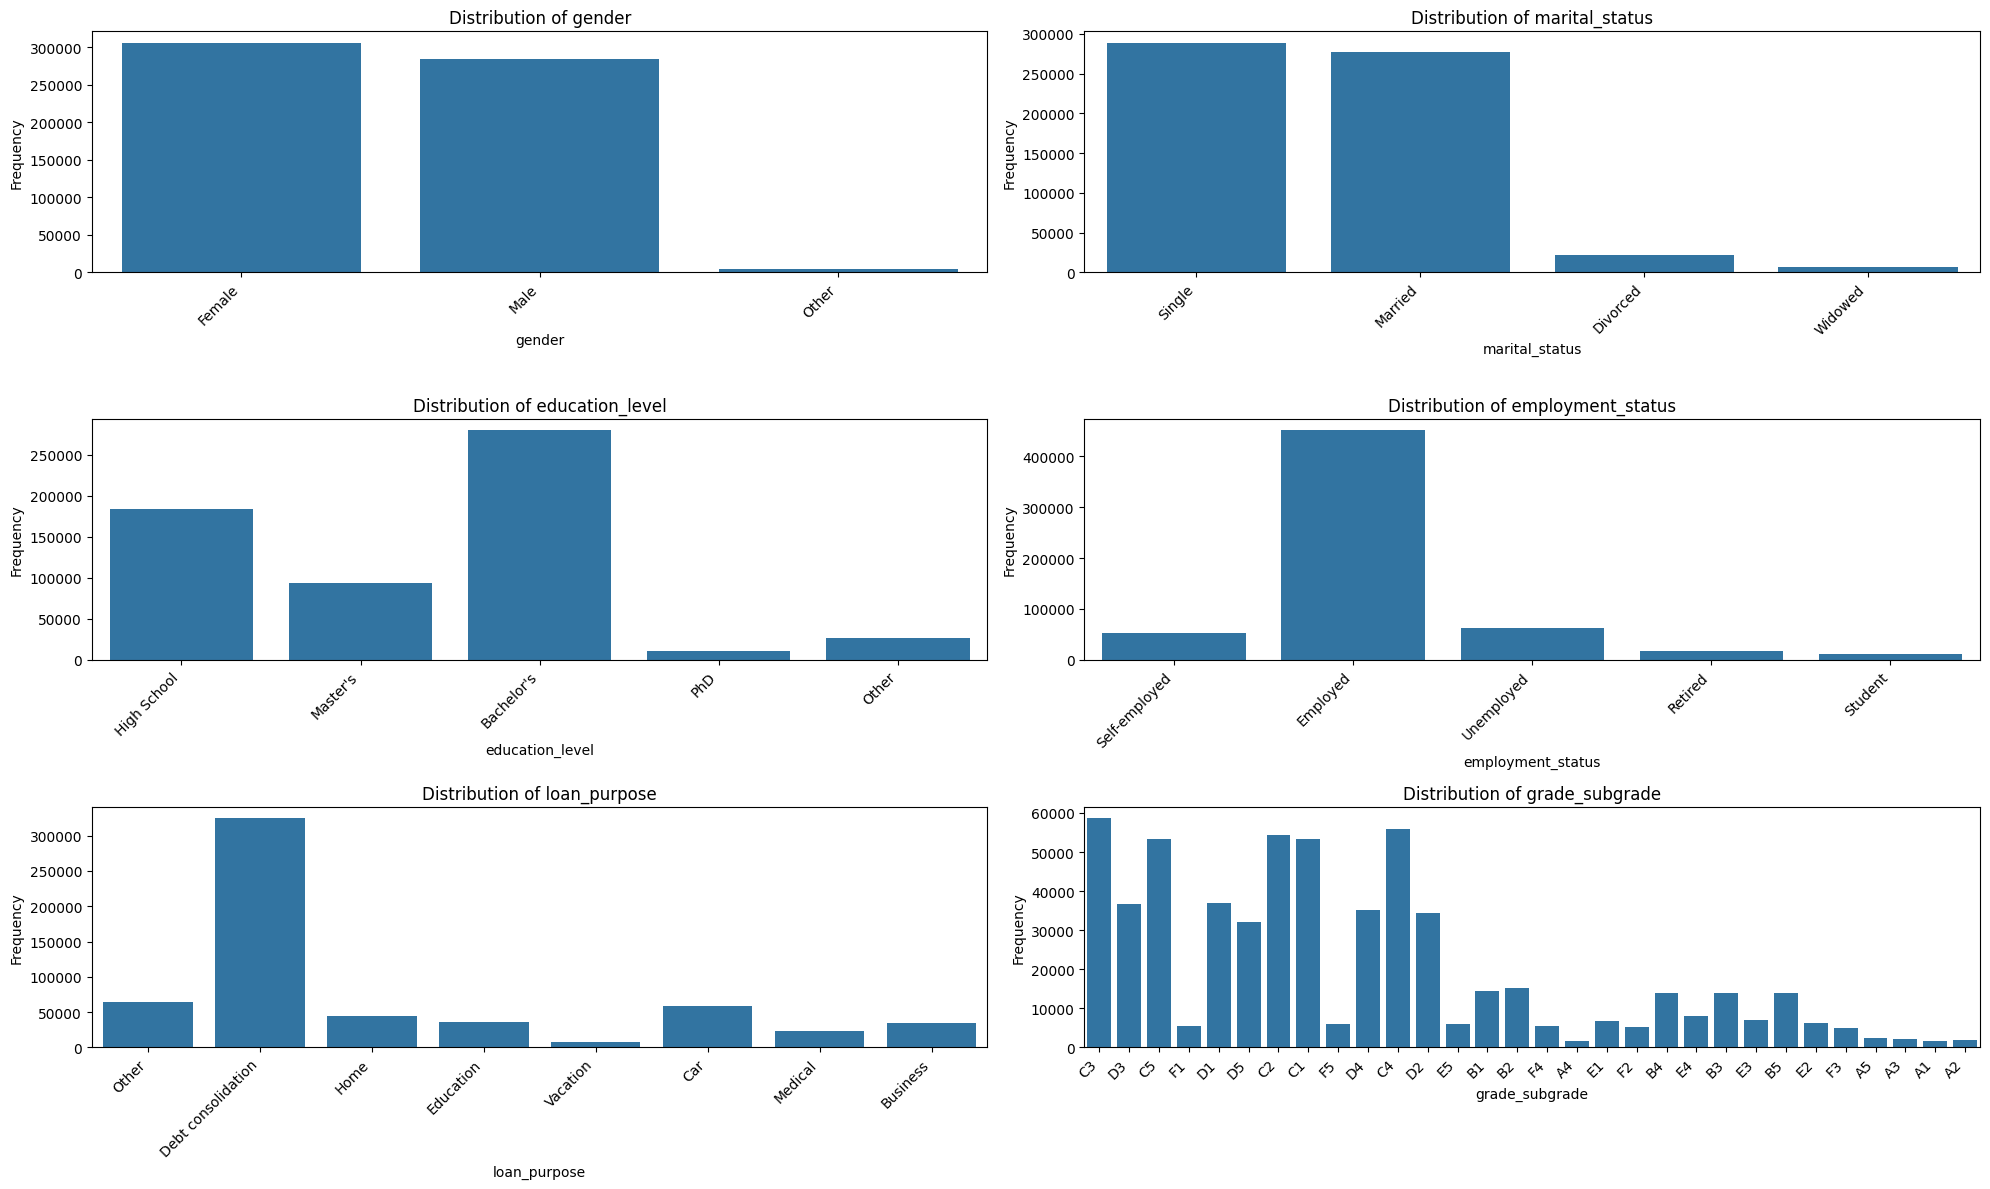

In [18]:
if len(cat_cols) > 0:
    n_cols = 2
    n_rows = -(-len(cat_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
    if n_rows == 1 and len(cat_cols) == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        sns.countplot(train_df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].set_ylabel('Frequency')

    for i in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found in the dataset.")

## Outlier

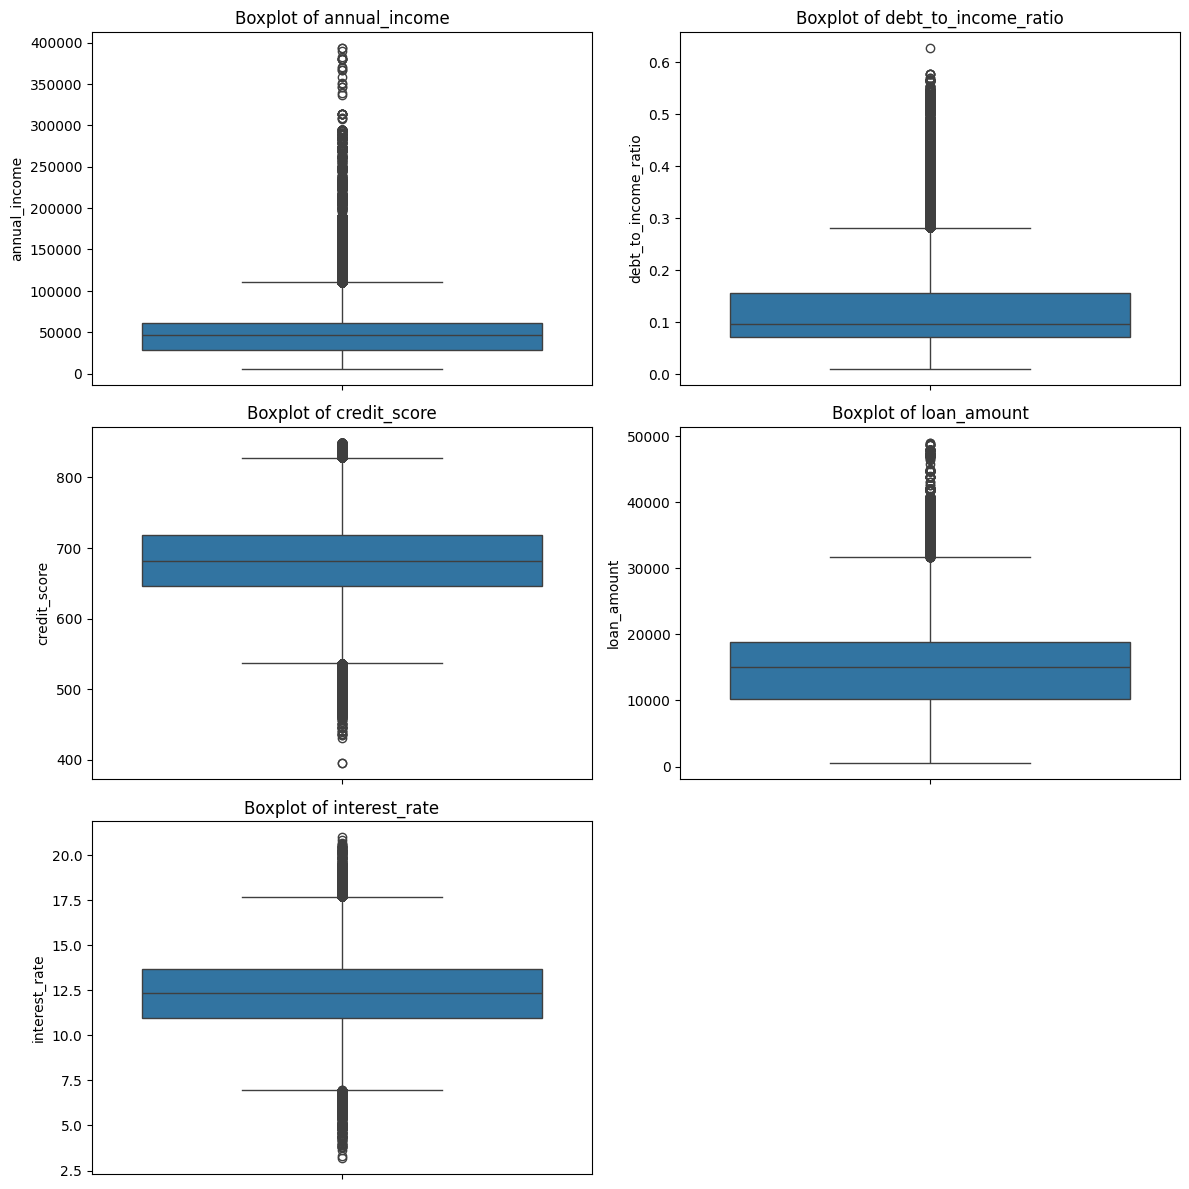

In [19]:
if len(num_cols) > 0:
    n_cols = 2
    n_rows = -(-len(num_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    if n_rows == 1 and len(num_cols) == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.boxplot(train_df, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)
        
    for i in range(len(num_cols), len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found in the dataset.")

## Feature-target relationship analysis

### Numerical and target

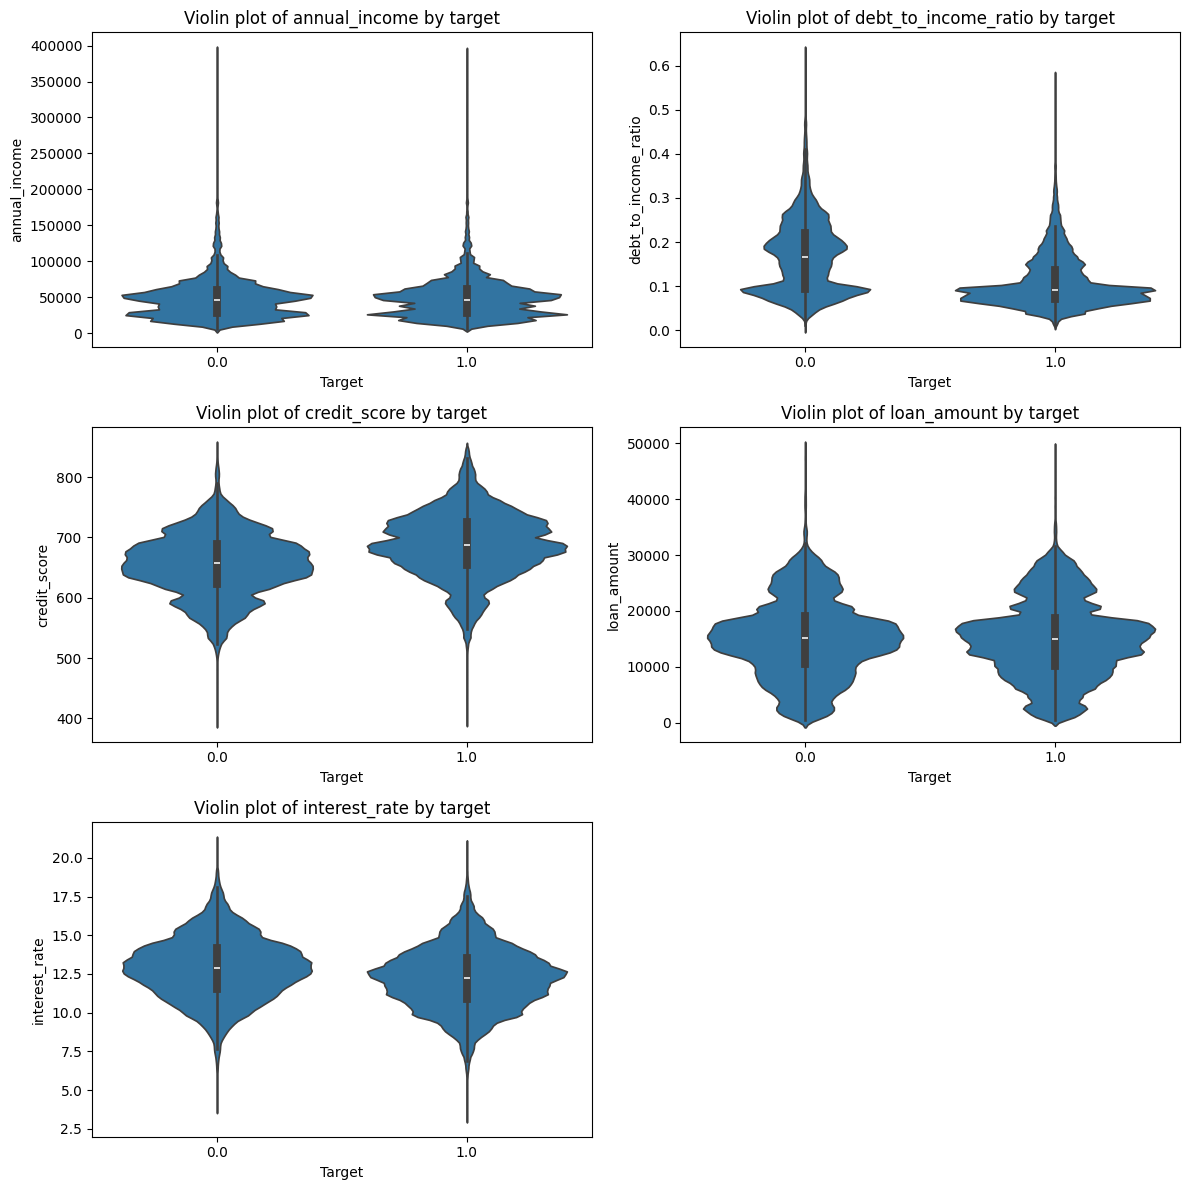

In [21]:
if len(num_cols) > 0:
    n_cols = 2
    n_rows = -(-len(num_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    if n_rows == 1 and len(num_cols) == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.violinplot(train_df, x='loan_paid_back', y=col, ax=axes[i])
        axes[i].set_title(f'Violin plot of {col} by target')
        axes[i].set_xlabel('Target')
        axes[i].set_ylabel(col)
        
    for i in range(len(num_cols), len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for violin plot analysis.")

### Categorical and target

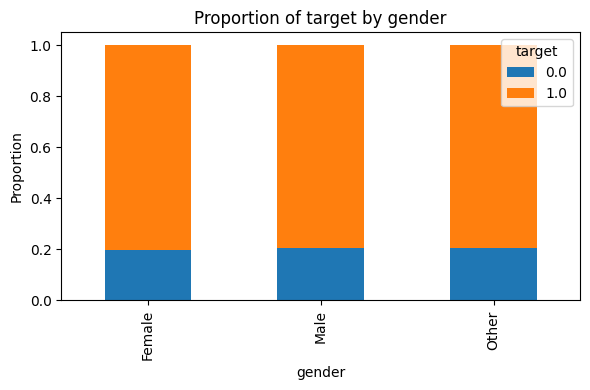

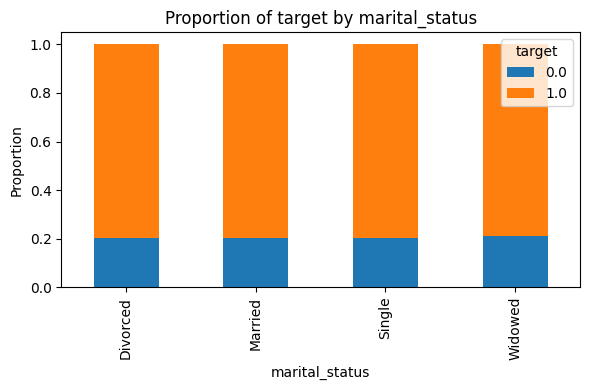

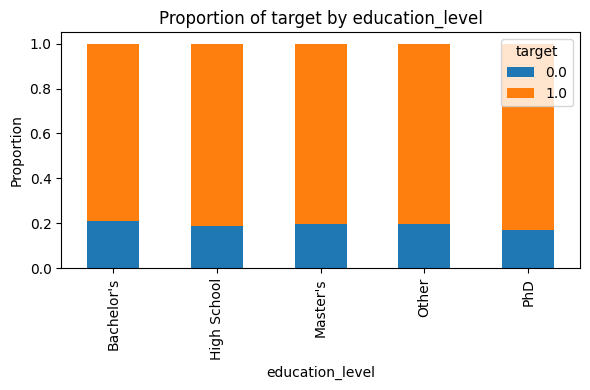

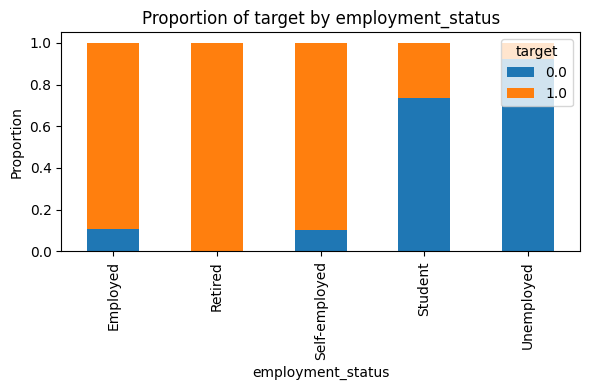

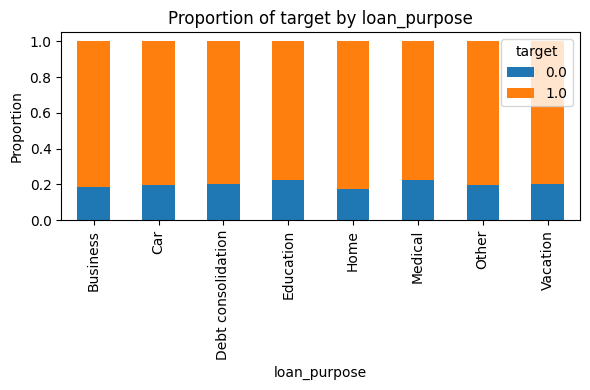

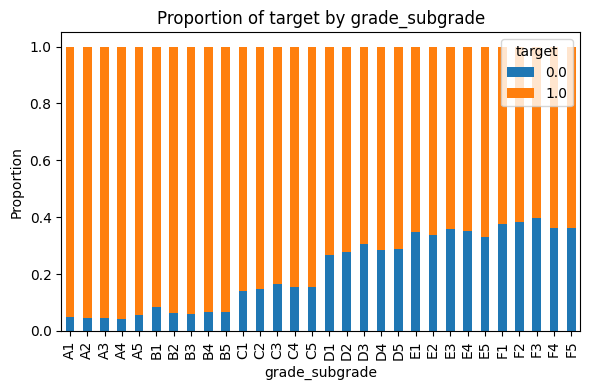

In [23]:
if len(cat_cols) > 0:
    for col in cat_cols:
        ct = pd.crosstab(train_df[col], train_df['loan_paid_back'], normalize='index')
        ct.plot(kind='bar', stacked=True, figsize=(6, 4))
        plt.title(f'Proportion of target by {col}')
        plt.xlabel(col)
        plt.ylabel('Proportion')
        plt.legend(title='target', loc='upper right')
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns to analyze with target.")

## Pairplot matrix

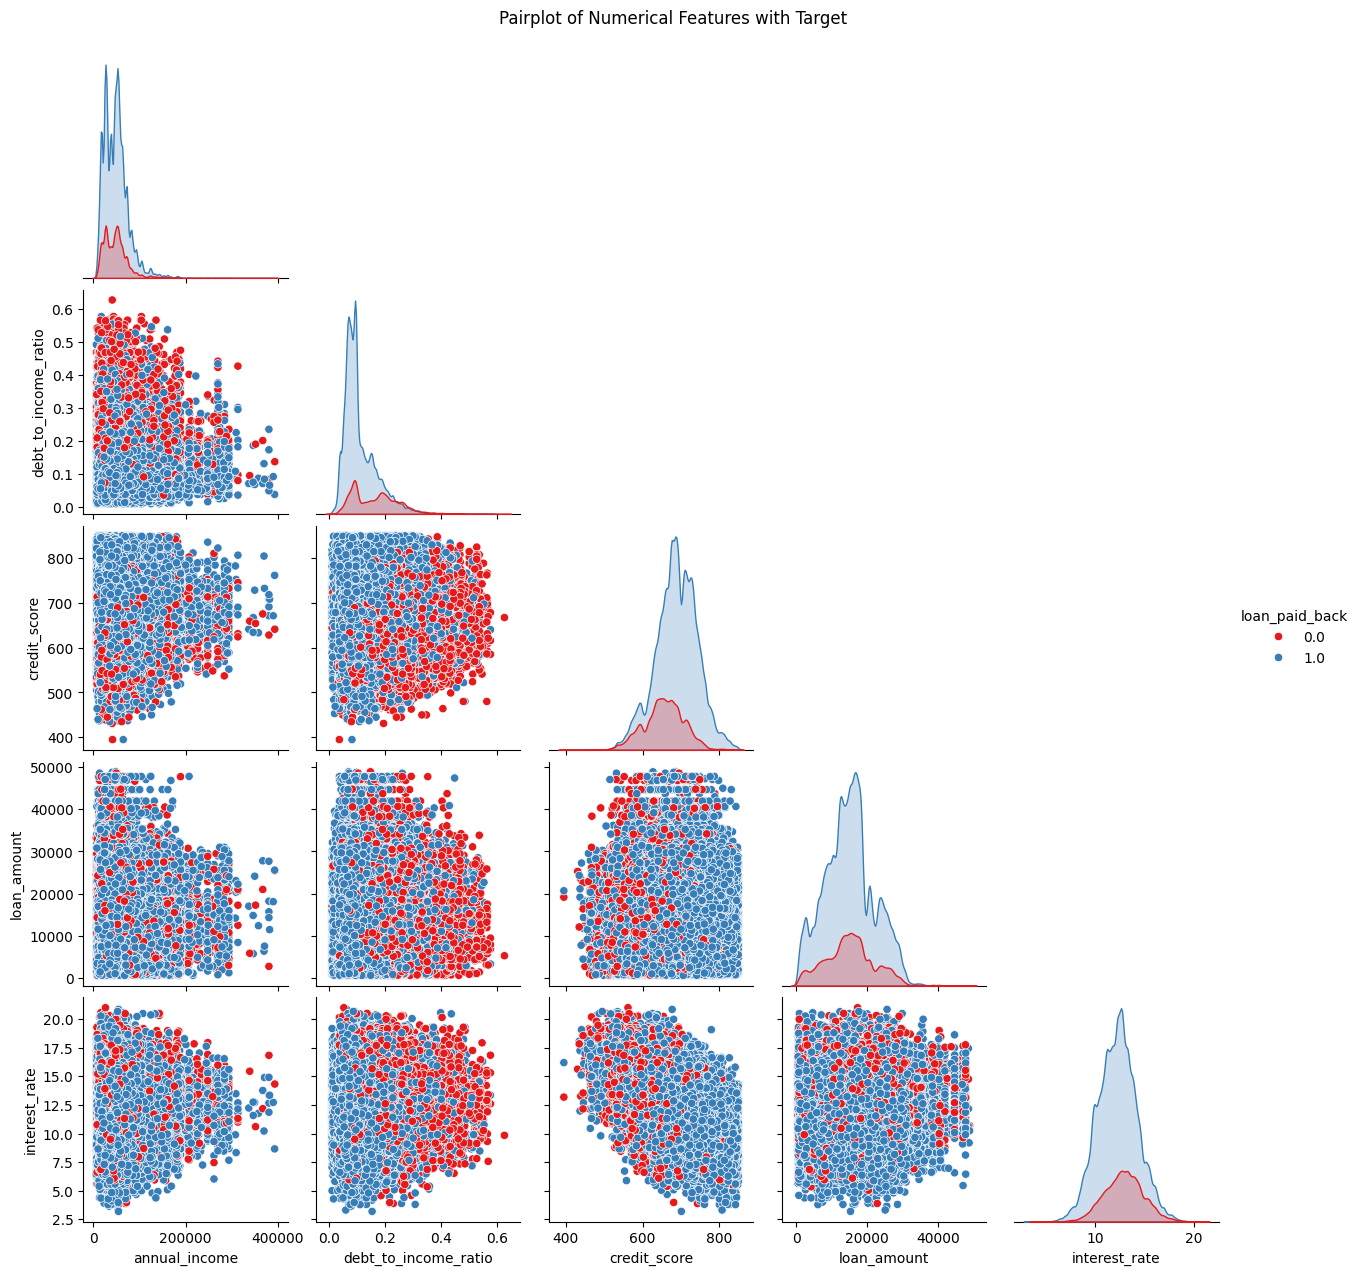

In [25]:
if len(num_cols) > 0:
    pairplot_cols = num_cols.tolist() + ['loan_paid_back']
    
    sns.pairplot(train_df[pairplot_cols], hue='loan_paid_back', diag_kind='kde', palette="Set1", corner=True)
    plt.suptitle('Pairplot of Numerical Features with Target', y=1.02)
    plt.show()
else:
    print("No numerical columns found for pairplot analysis.")

## Multicolinearity analysis

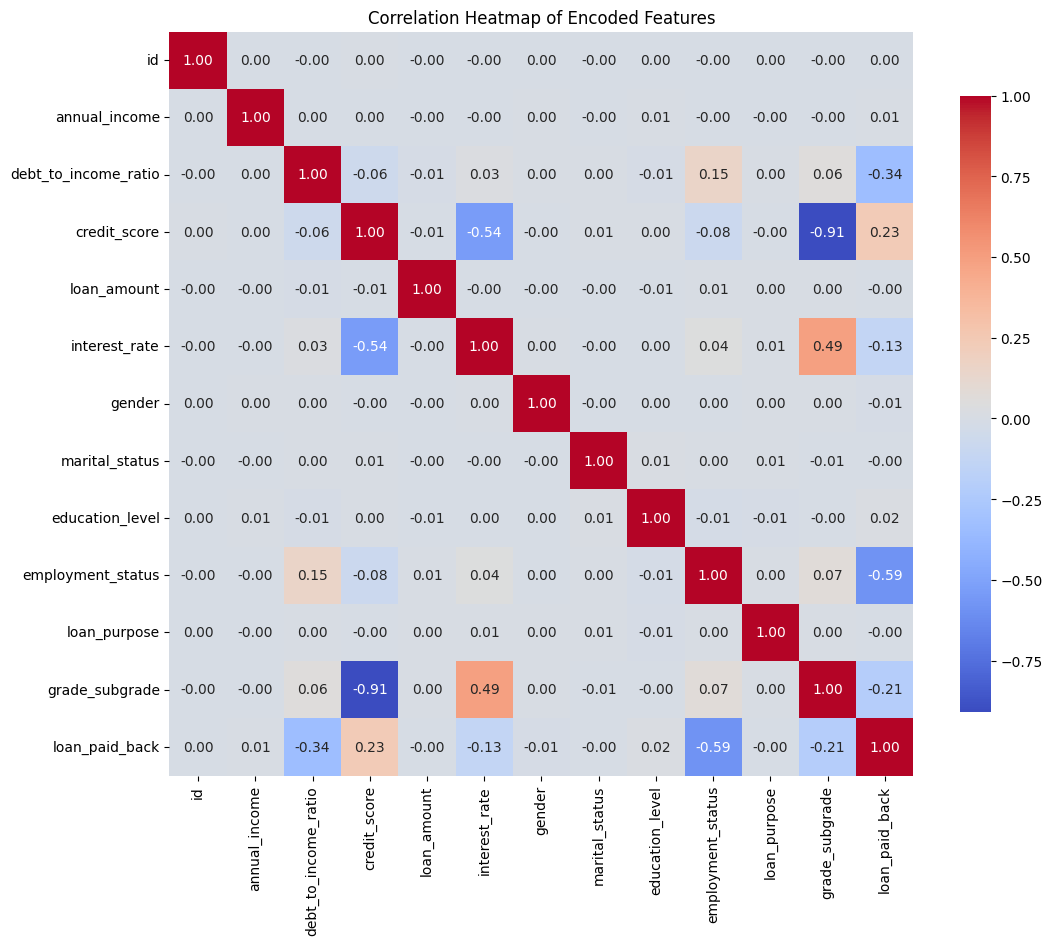

In [26]:
train_to_encode = train_df.copy()
train_encoded = pre.label_encode(train_to_encode)
train_corr = train_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(train_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

In [27]:
def analyze_correlation(corr_matrix, top_n=5):
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .reset_index()
    )
    corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    top_pos = corr_pairs.sort_values(by='Correlation', ascending=False).head(top_n)
    top_neg = corr_pairs.sort_values(by='Correlation').head(top_n)
    print("Top positively correlated feature pairs:")
    display(top_pos)
    print("\nTop negatively correlated feature pairs:")
    display(top_neg)

analyze_correlation(train_corr, top_n=5)

Top positively correlated feature pairs:


,Feature 1,Feature 2,Correlation
55,interest_rate,grade_subgrade,0.488369
41,credit_score,loan_paid_back,0.234560
29,debt_to_income_ratio,employment_status,0.153695
73,employment_status,grade_subgrade,0.069464
31,debt_to_income_ratio,grade_subgrade,0.057069



Top negatively correlated feature pairs:


,Feature 1,Feature 2,Correlation
40,credit_score,grade_subgrade,-0.907313
74,employment_status,loan_paid_back,-0.585304
34,credit_score,interest_rate,-0.538335
32,debt_to_income_ratio,loan_paid_back,-0.335680
77,grade_subgrade,loan_paid_back,-0.212376


## Skewness and kurtosis analysis

,skew,kurtosis
annual_income,1.719509,7.091413
debt_to_income_ratio,1.406680,2.335230
credit_score,-0.166993,0.095962
loan_amount,0.207360,-0.150142
interest_rate,0.049945,0.059798


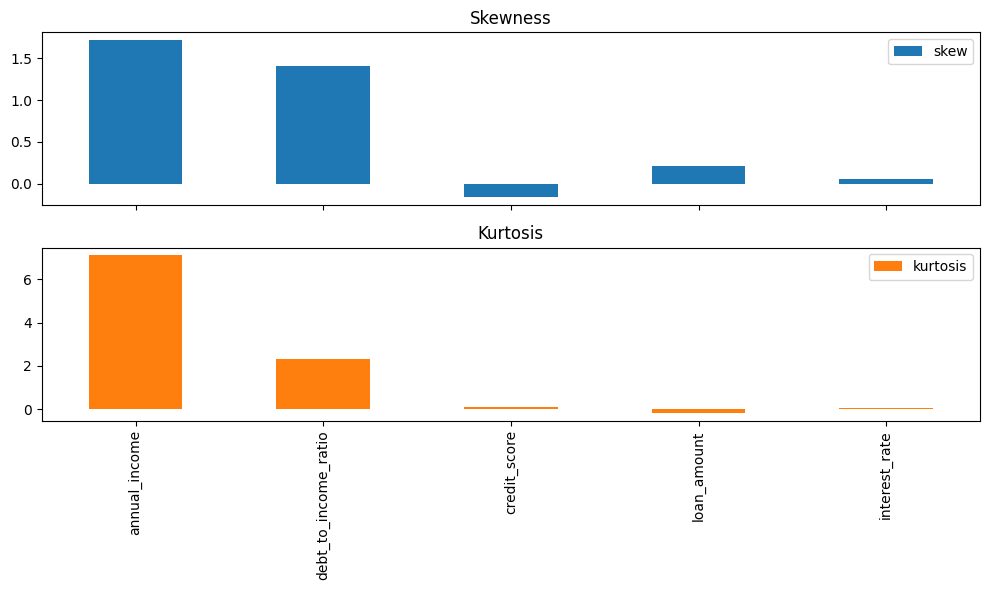

In [28]:
if len(num_cols) > 0:
    skew_kurt = pd.DataFrame({
        'skew': train_df[num_cols].skew(),
        'kurtosis': train_df[num_cols].kurt()
    })

    display(skew_kurt)

    skew_kurt.plot(kind='bar', subplots=True, layout=(2, 1), figsize=(10, 6), title=['Skewness', 'Kurtosis'])
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for skewness and kurtosis analysis.")

## Unique values and category frequency analysis

In [29]:
if len(cat_cols) > 0:
    for col in cat_cols:
        print(f"Feature: {col}")
        print(f"  Unique category count: {train_df[col].nunique()}")
        if train_df[col].nunique() > 0:
            top_cat = train_df[col].value_counts().idxmax()
            top_freq = train_df[col].value_counts().max()
            print(f"  Most frequent categories: {top_cat} ({top_freq} data)")
        print("-" * 45)
else:
    print("No categorical columns found in the dataset.")
    print("All features appear to be numerical.")

Feature: gender
  Unique category count: 3
  Most frequent categories: Female (306175 data)
---------------------------------------------
Feature: marital_status
  Unique category count: 4
  Most frequent categories: Single (288843 data)
---------------------------------------------
Feature: education_level
  Unique category count: 5
  Most frequent categories: Bachelor's (279606 data)
---------------------------------------------
Feature: employment_status
  Unique category count: 5
  Most frequent categories: Employed (450645 data)
---------------------------------------------
Feature: loan_purpose
  Unique category count: 8
  Most frequent categories: Debt consolidation (324695 data)
---------------------------------------------
Feature: grade_subgrade
  Unique category count: 30
  Most frequent categories: C3 (58695 data)
---------------------------------------------


## Constant value analysis

In [30]:
constant_cols = [col for col in train_df.columns if train_df[col].nunique() == 1]
if constant_cols:
    print("Columns with constant values (only one unique value):")
    for col in constant_cols:
        print(f"- {col}: {train_df[col].unique()[0]}")
else:
    print("There are no columns with constant values.")

There are no columns with constant values.
